In [93]:
import pandas as pd
df = pd.read_excel("glass1.xlsx")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [95]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [99]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

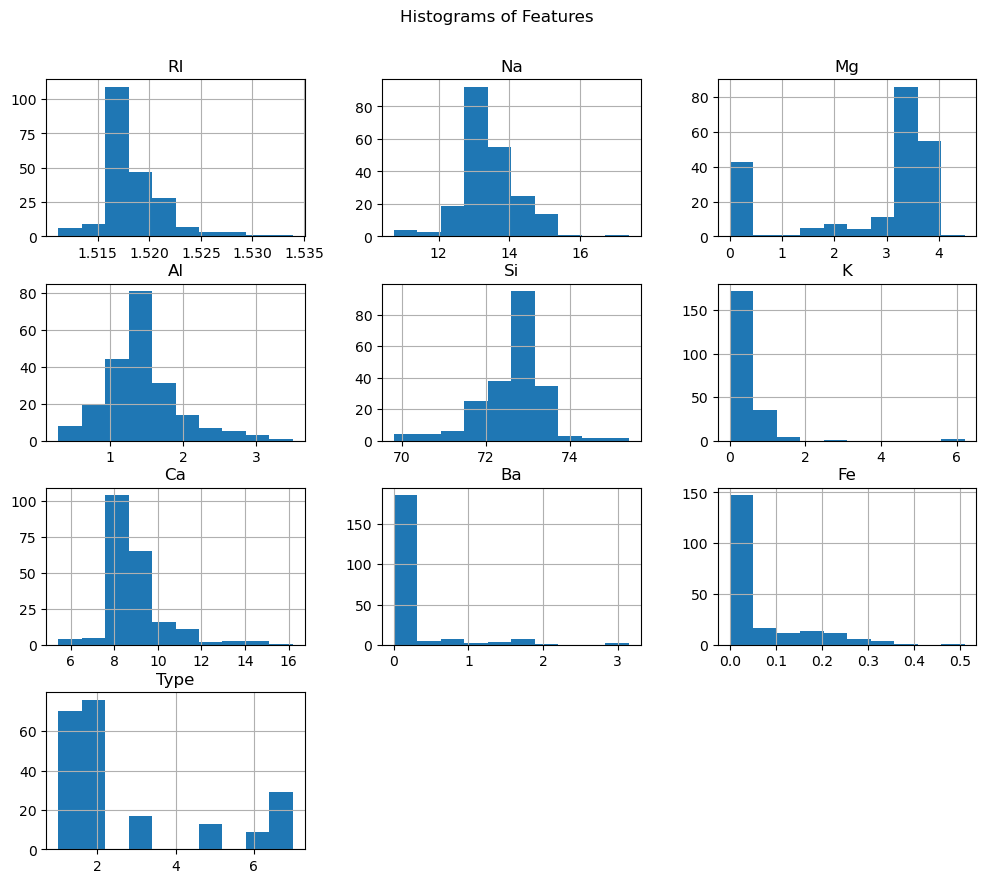

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Features', y=0.95)
plt.show()

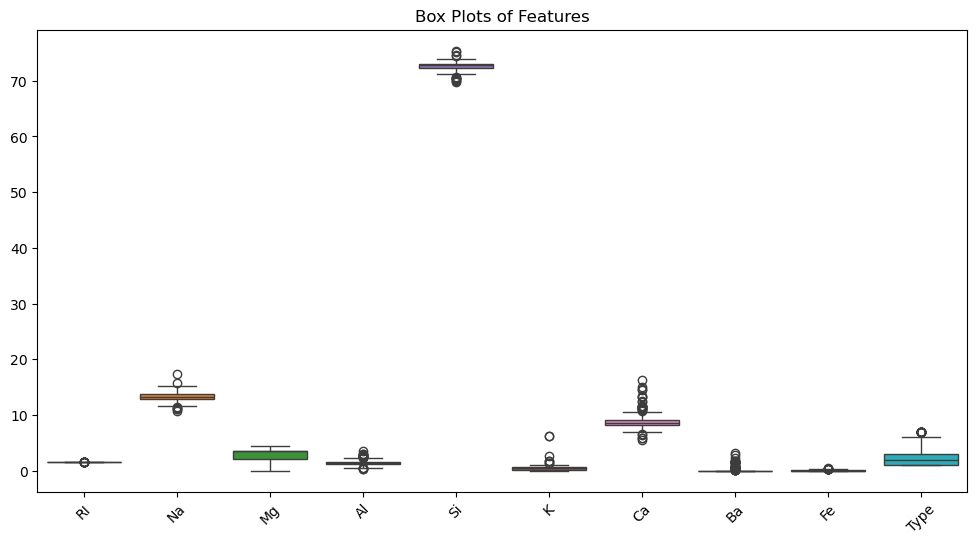

In [102]:
# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plots of Features')
plt.xticks(rotation=45)
plt.show()

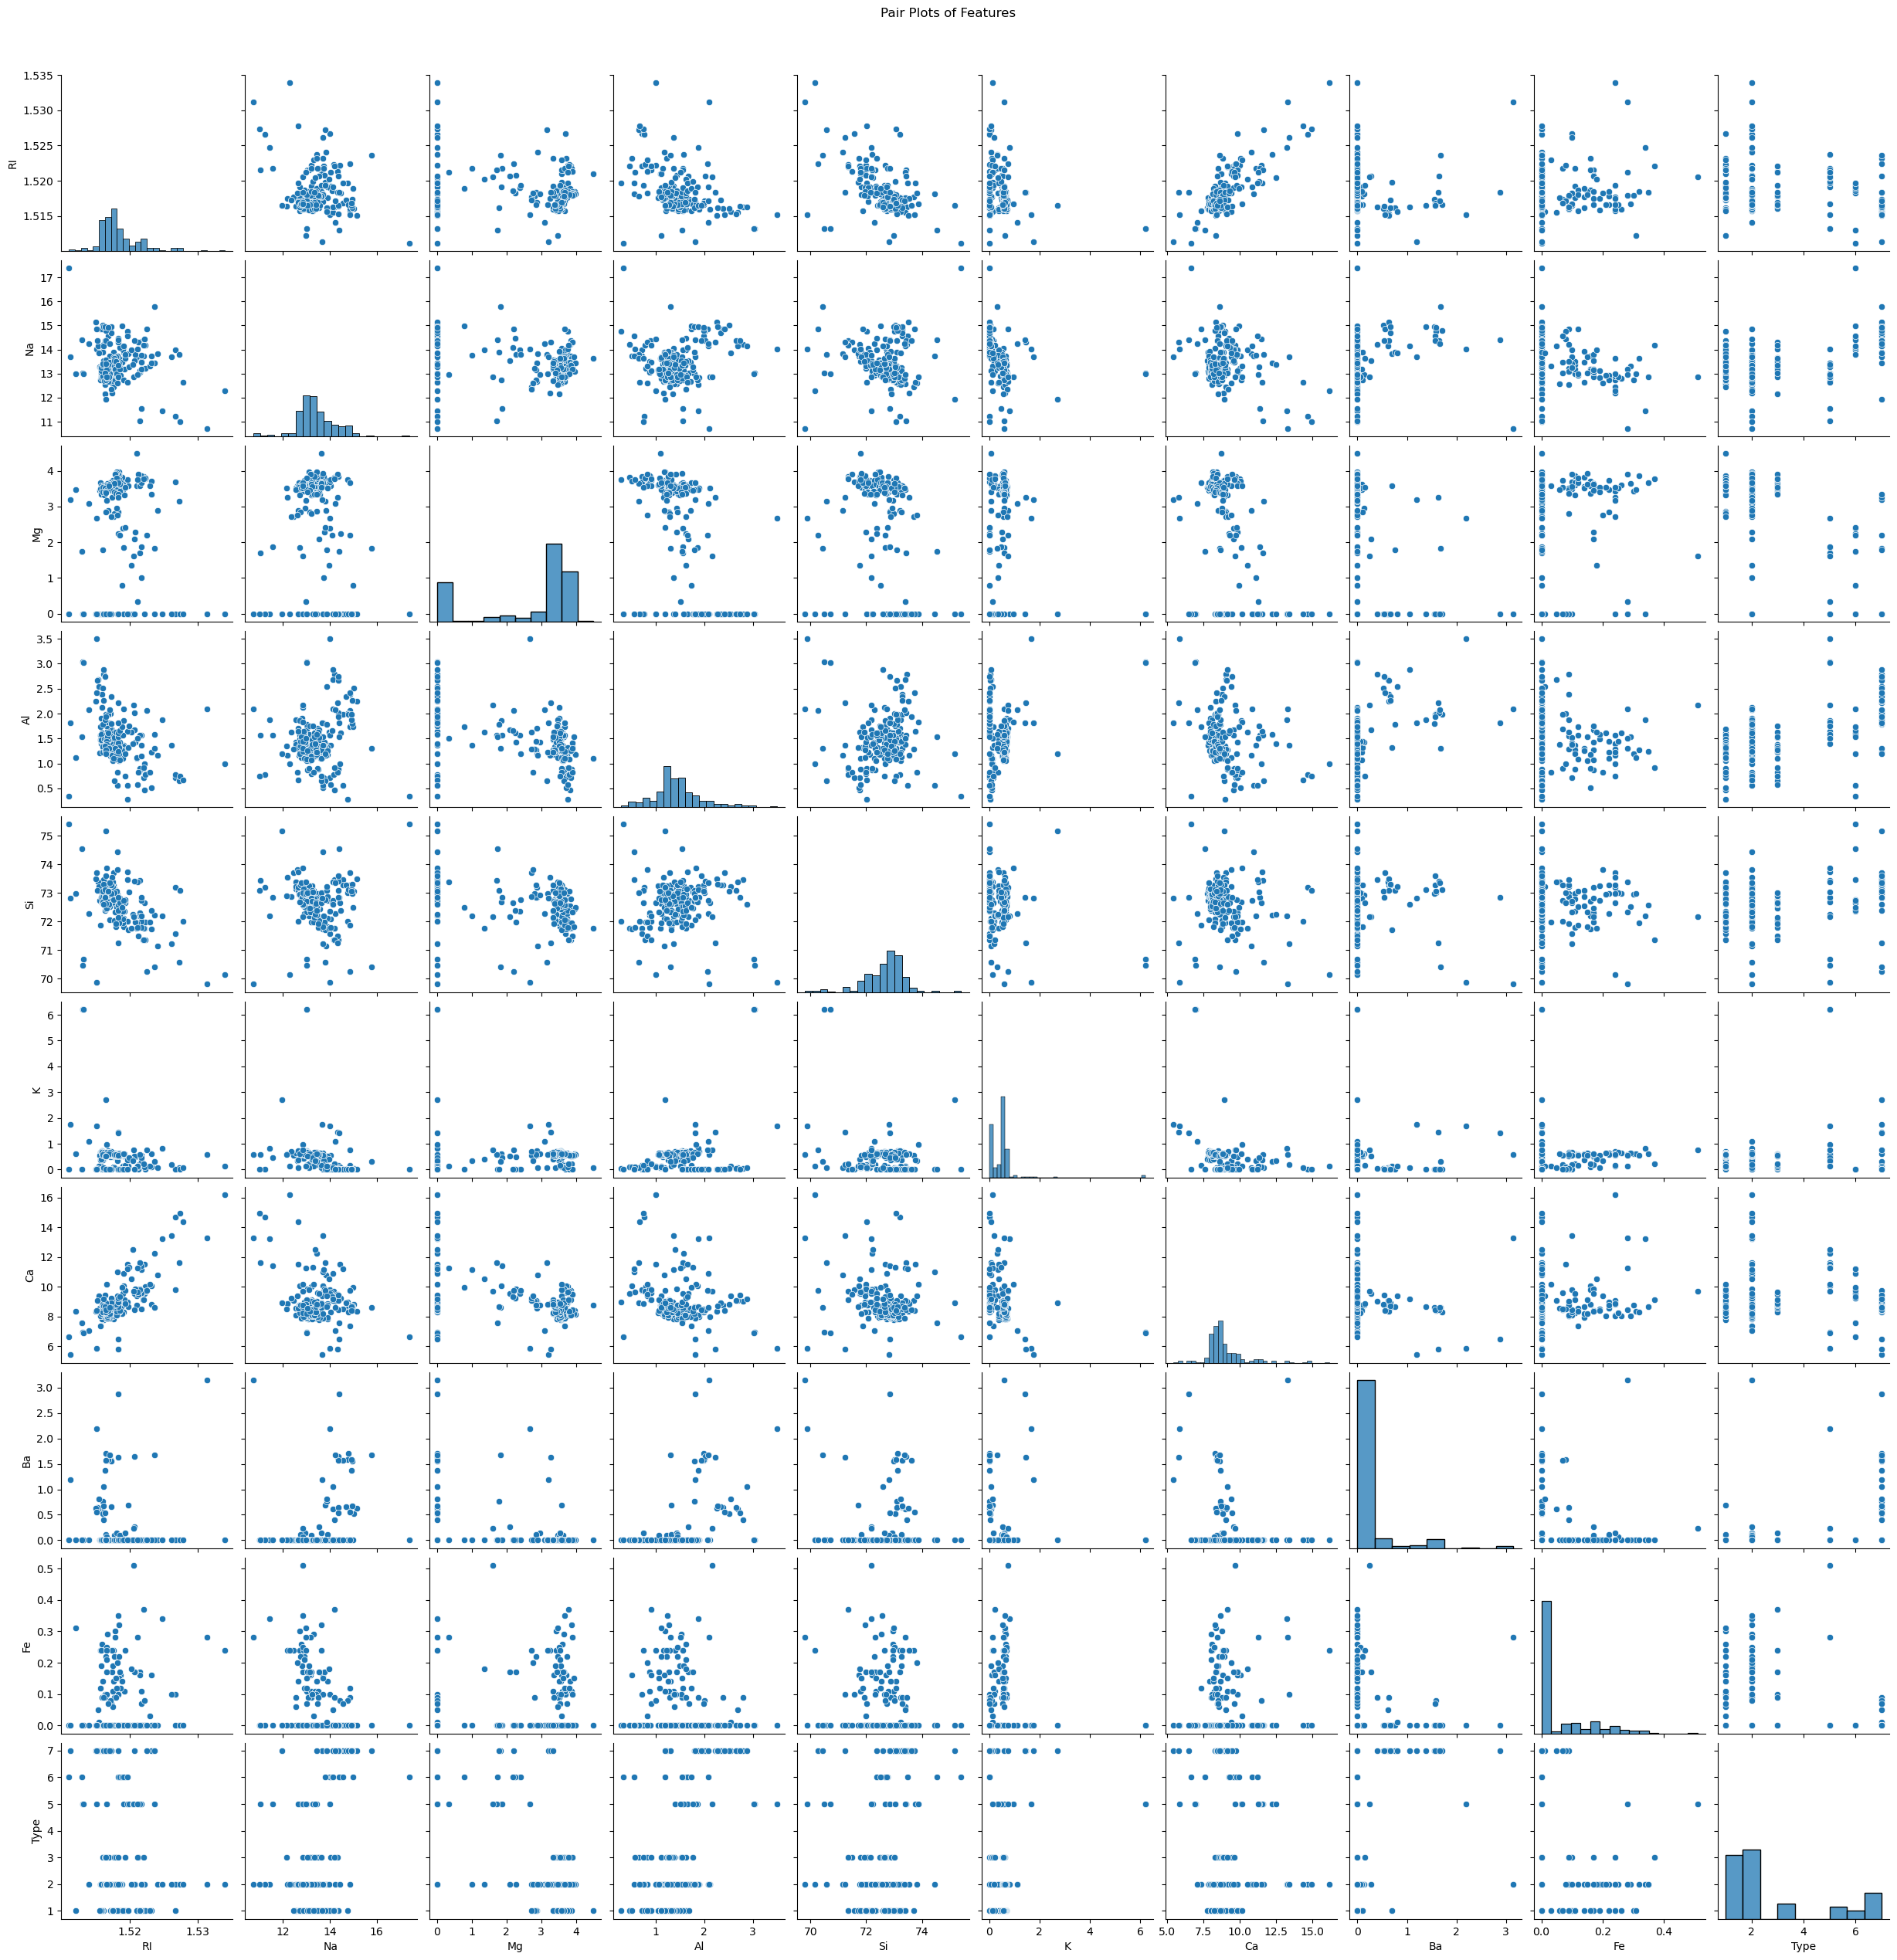

In [103]:
# Pair plots
sns.pairplot(df)
plt.suptitle('Pair Plots of Features', y=1.02)
plt.show()

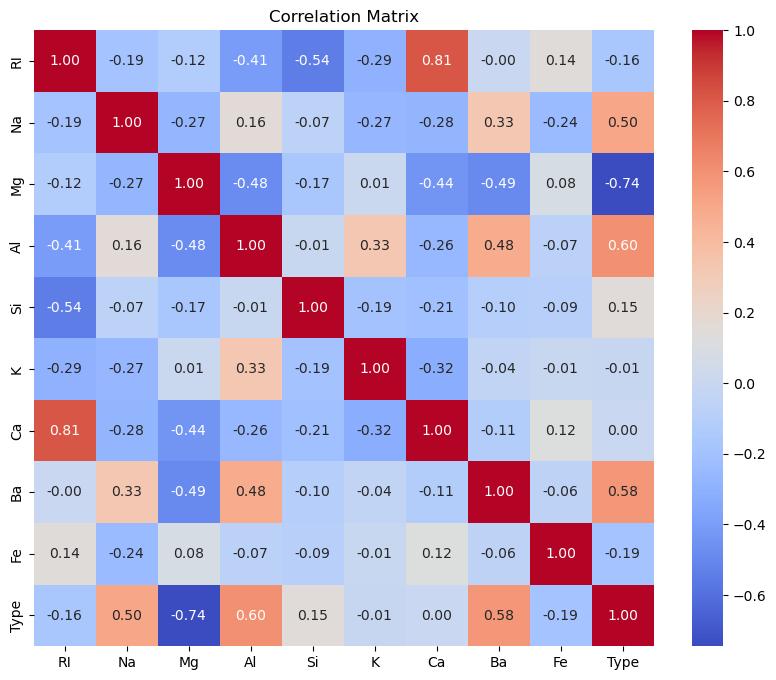

In [104]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [109]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer(strategy='mean')  # Replace missing values with the mean
df_SI = pd.DataFrame(SI.fit_transform(df))
df_SI.columns = df.columns  # Restore column names
df1 = df_SI
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0


In [117]:
X = df.drop('Type', axis=1)  # Features
Y = df['Type']   

In [119]:
# split and X and Y
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_SS = SS.fit_transform(X)
X_SS = pd.DataFrame(X_SS)
X_SS.columns = list(X)
X_SS


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [121]:
# Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_SS,Y, 
                                                 test_size=0.3,random_state=10)

In [127]:
# cross validation with randomforest regressor
#=========================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error

training_err = []
test_err = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X_SS,Y, test_size=0.25,random_state=i)
    model = RandomForestClassifier(max_samples=0.8,max_features=0.7)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test  = model.predict(X_test)
    training_err.append(mean_squared_error(Y_train,Y_pred_train,squared=False))
    test_err.append(mean_squared_error(Y_test,Y_pred_test,squared=False))

import numpy as np
print("Cross validation - Training error:" ,np.mean(training_err).round(2))
print("Cross validation - Test error:" ,np.mean(test_err).round(2))
print("RandomForestRegressor -variance :" ,(np.mean(test_err)-np.mean(training_err)).round(2))


Cross validation - Training error: 0.04
Cross validation - Test error: 1.19
RandomForestRegressor -variance : 1.15


In [131]:
# cross validation with Bagging regressor
#=========================================================
from sklearn.ensemble import BaggingClassifier

training_err = []
test_err = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X_SS,Y, test_size=0.25,random_state=i)
    model = BaggingClassifier(estimator=None, max_samples=0.8,max_features=0.7)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test  = model.predict(X_test)
    training_err.append(mean_squared_error(Y_train,Y_pred_train,squared=False))
    test_err.append(mean_squared_error(Y_test,Y_pred_test,squared=False))

import numpy as np
print("Cross validation - Training error:" ,np.mean(training_err).round(2))
print("Cross validation - Test error:" ,np.mean(test_err).round(2))
print("bagging -variance :" ,(np.mean(test_err)-np.mean(training_err)).round(2))


Cross validation - Training error: 0.33
Cross validation - Test error: 1.22
bagging -variance : 0.89


In [129]:
# cross validation with AdaBoost
#=========================================================
from sklearn.ensemble import AdaBoostClassifier

training_err = []
test_err = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X_SS,Y, test_size=0.25,random_state=i)
    model = AdaBoostClassifier(learning_rate=0.1,n_estimators=100)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test  = model.predict(X_test)
    training_err.append(mean_squared_error(Y_train,Y_pred_train,squared=False))
    test_err.append(mean_squared_error(Y_test,Y_pred_test,squared=False))

import numpy as np
print("Cross validation - Training error:" ,np.mean(training_err).round(2))
print("Cross validation - Test error:" ,np.mean(test_err).round(2))
print("Ada Boost -variance :" ,(np.mean(test_err)-np.mean(training_err)).round(2))



Cross validation - Training error: 1.43
Cross validation - Test error: 1.55
Ada Boost -variance : 0.12
